# Polynomial Regression with Python and sklearn

In [2]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Load the Dataset

In [4]:

# Load the dataset
data = pd.read_csv('Position_Salaries.csv')

# Display the first few rows of the dataset
data.head()
    

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


<Axes: xlabel='Level', ylabel='Count'>

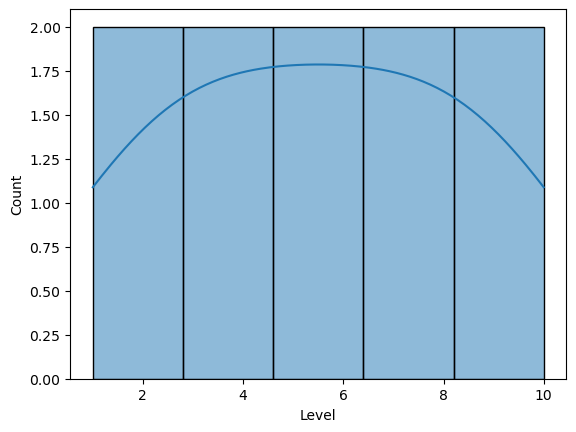

In [6]:
sns.histplot(data=data['Level'], kde=True)

<Axes: xlabel='Salary', ylabel='Count'>

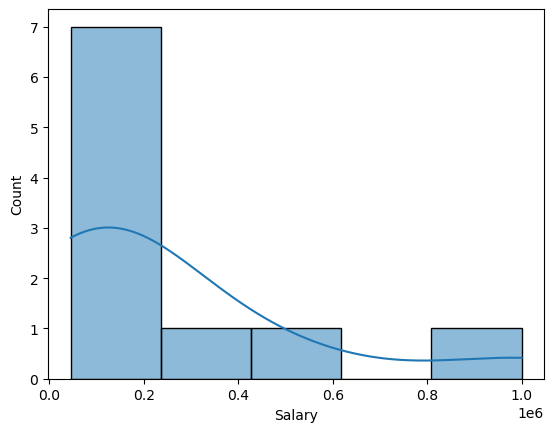

In [8]:
sns.histplot(data=data['Salary'], kde=True)

In [18]:
data['Level_Scaled'] = prep.scale(data['Level'])
data['Salary_Scaled'] = prep.scale(data['Salary'])

<Axes: xlabel='Salary_Scaled', ylabel='Count'>

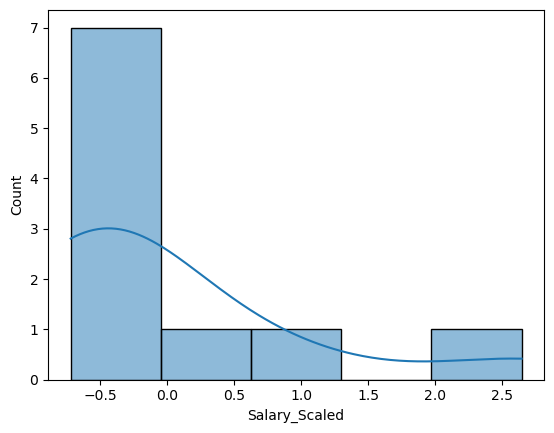

In [14]:
sns.histplot(data=data['Salary_Scaled'], kde=True)

<Axes: xlabel='Level_Scaled', ylabel='Salary_Scaled'>

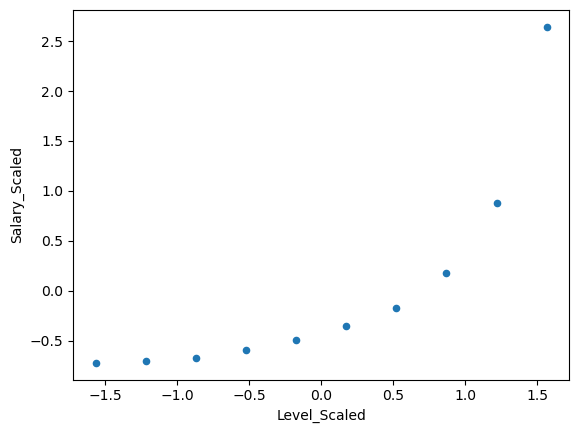

In [20]:
data.plot.scatter(x='Level_Scaled', y='Salary_Scaled')

## Step 2: Extract Independent and Dependent Variables

In [22]:

# Extracting 'Level' as X and 'Salary' as y
X = data[['Level_Scaled']].values
y = data['Salary_Scaled'].values
    

## Let's see what a simple linear model would look like

In [25]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

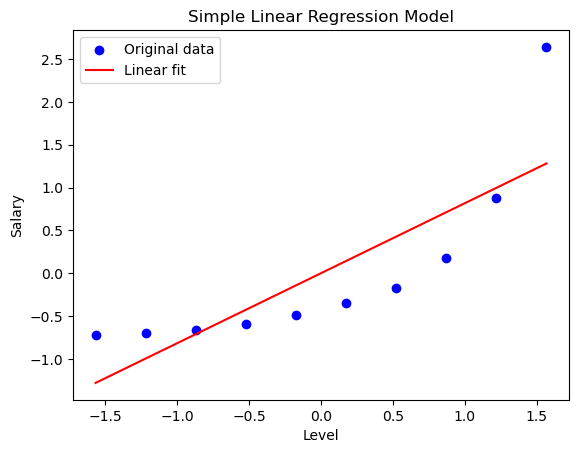

In [27]:
# Predict the salary values using the simple linear model 
y_pred = model.predict(X)

# Visualize the original data and the polynomial regression curve
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Linear fit')
plt.title('Simple Linear Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
    

## Now let's see if we can fix this with transforming our predictor features into polynomial features

## Step 3: Transform the Data into Polynomial Features

In [29]:

# Transform the data into polynomial features (degree=4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
    

In [31]:
X_poly

array([[ 1.00000000e+00, -1.56669890e+00,  2.45454545e+00,
        -3.84553367e+00,  6.02479339e+00],
       [ 1.00000000e+00, -1.21854359e+00,  1.48484848e+00,
        -1.80935261e+00,  2.20477502e+00],
       [ 1.00000000e+00, -8.70388280e-01,  7.57575758e-01,
        -6.59385060e-01,  5.73921028e-01],
       [ 1.00000000e+00, -5.22232968e-01,  2.72727273e-01,
        -1.42427173e-01,  7.43801653e-02],
       [ 1.00000000e+00, -1.74077656e-01,  3.03030303e-02,
        -5.27508048e-03,  9.18273646e-04],
       [ 1.00000000e+00,  1.74077656e-01,  3.03030303e-02,
         5.27508048e-03,  9.18273646e-04],
       [ 1.00000000e+00,  5.22232968e-01,  2.72727273e-01,
         1.42427173e-01,  7.43801653e-02],
       [ 1.00000000e+00,  8.70388280e-01,  7.57575758e-01,
         6.59385060e-01,  5.73921028e-01],
       [ 1.00000000e+00,  1.21854359e+00,  1.48484848e+00,
         1.80935261e+00,  2.20477502e+00],
       [ 1.00000000e+00,  1.56669890e+00,  2.45454545e+00,
         3.84553367e+00

## Step 4: Fit a Polynomial Regression Model

In [34]:

# Fit the linear regression model to the polynomial-transformed data
model = LinearRegression()
model.fit(X_poly, y)
    

LinearRegression()

## Step 5: Predict and Visualize the Results

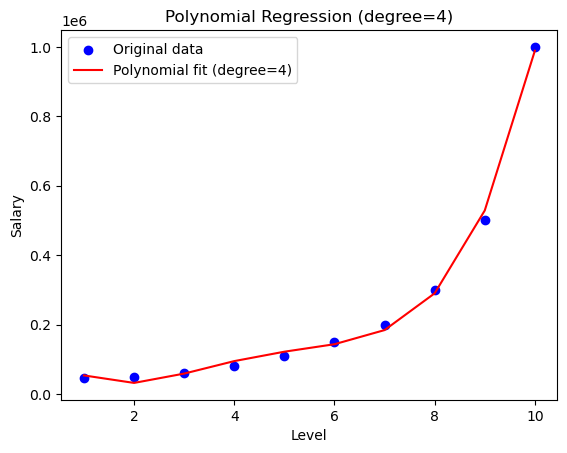

In [65]:

# Predict the salary values using the model
y_pred = model.predict(X_poly)

# Visualize the original data and the polynomial regression curve
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Polynomial fit (degree=4)')
plt.title('Polynomial Regression (degree=4)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
    

## Step 6: Evaluate the Model

In [39]:

from sklearn.metrics import r2_score

# Calculate the R-squared value to evaluate model performance
r2 = r2_score(y, y_pred)
r2
    

0.6690412331929894

In [51]:
def build_poly_regression_model(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Visualize the original data and the polynomial regression curve
    plt.scatter(X, y, color='blue', label='Original data')
    plt.plot(X, y_pred, color='red', label='Polynomial fit (degree=' + str(degree) + ')')
    plt.title('Polynomial Regression (degree=' + str(degree) + ')')
    plt.xlabel('Level')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()
    r2 = r2_score(y, y_pred)
    print("R-squared for degree ", degree, ": ", r2)

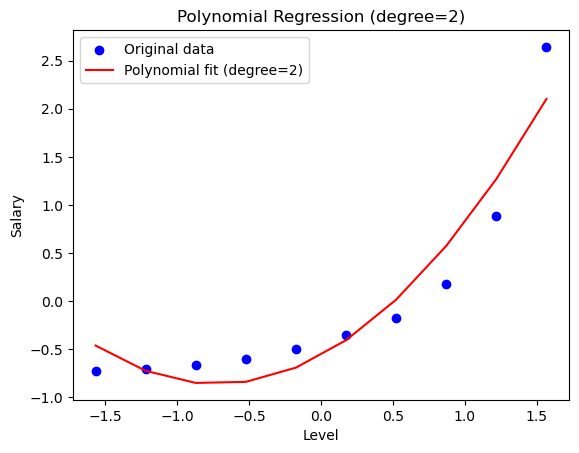

R-squared for degree  2 :  0.9162082221443943


In [53]:
build_poly_regression_model(X, y, 2)

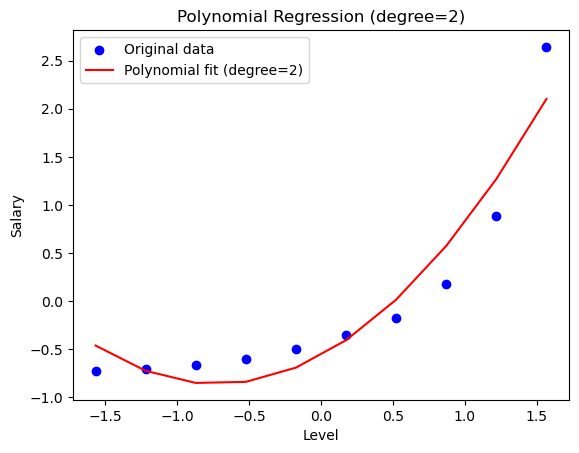

R-squared for degree  2 :  0.9162082221443943


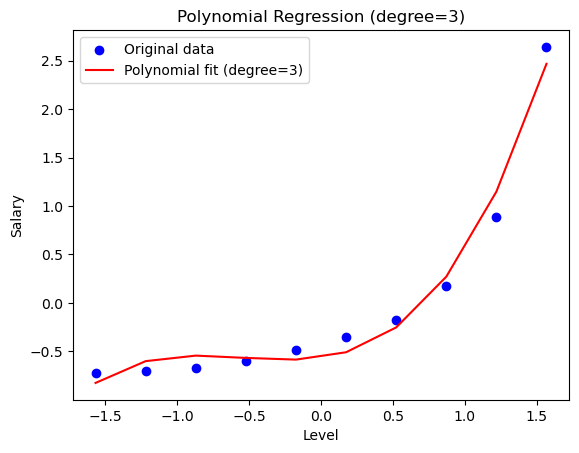

R-squared for degree  3 :  0.9812097727913367


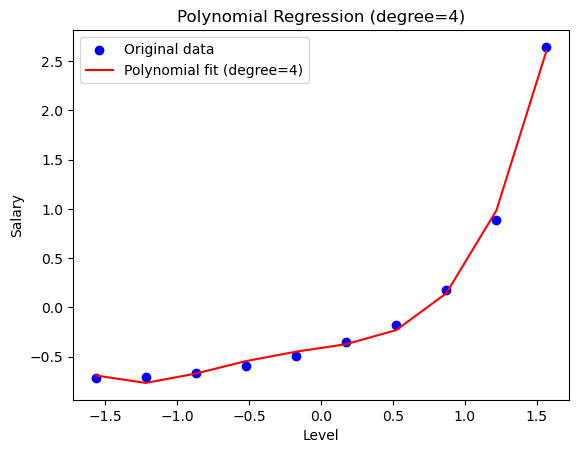

R-squared for degree  4 :  0.9973922891706614


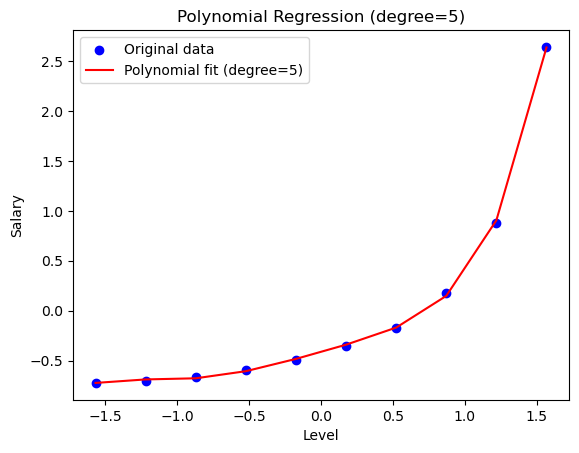

R-squared for degree  5 :  0.9997969027099755


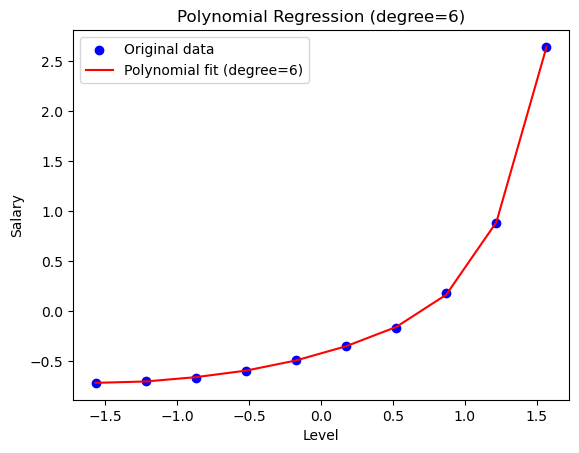

R-squared for degree  6 :  0.9999494749253776


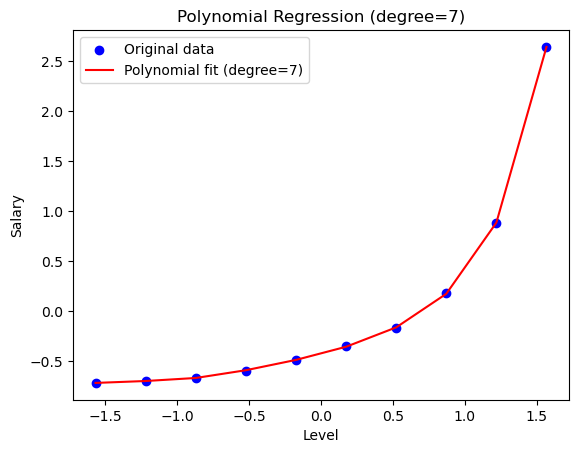

R-squared for degree  7 :  0.9999770143729169


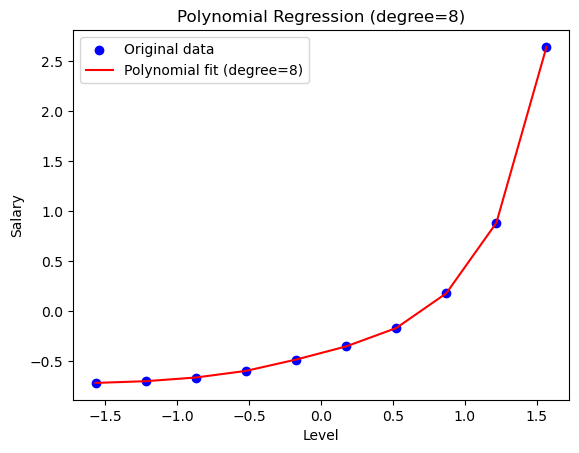

R-squared for degree  8 :  0.9999934972438328


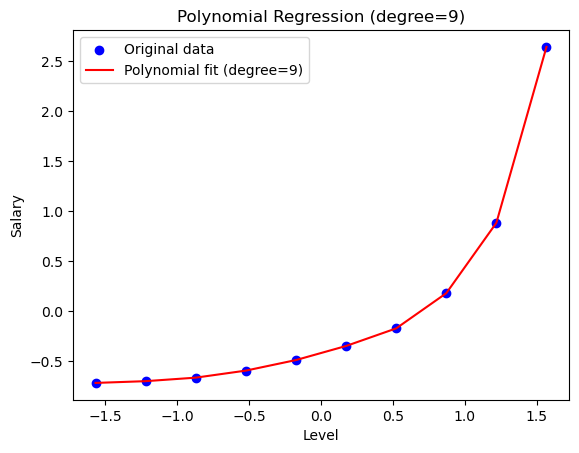

R-squared for degree  9 :  1.0


In [55]:
for i in range(2, 10):
    build_poly_regression_model(X, y, i)